In [1]:
#import library
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# import dataset lewat kaggle

from google.colab import files

files.upload()

{}

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d meetnaren/goodreads-best-books
!unzip goodreads-best-books.zip

100% 2.13G/2.13G [00:22<00:00, 73.4MB/s]
100% 2.13G/2.13G [00:22<00:00, 103MB/s] 


In [6]:
path = '/content/book_data.csv'

In [7]:
book = pd.read_csv(path)

# memilih 10k data pertama saja karena keterbatasan RAM

#read new_book

book.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [8]:
len(book)

54301

In [9]:
path_2 = 'https://raw.githubusercontent.com/hanszebua/RNM-FOOTBALL/main/BookDataLebihLengkap.csv'
path_3 = 'https://raw.githubusercontent.com/hanszebua/RNM-FOOTBALL/main/BookDataLebihLengkapv2.csv'

In [10]:
# user_profile = pd.read_csv(path_3, sep=';', encoding='cp1252')

user_profile = pd.read_csv(path_2, sep=';')


# user_profile = user_profile.drop(df.index[35:39])

user_profile

,Name (Original Title),Author,Genre,book_desc
0,Kafka on the Shore,Haruki Murakami,"Fiction, Magical Realism, Fantasy, Japan, Japa...","Kafka on the Shore, a tour de force of metaphy..."
1,Stardust,Neil Gaiman,"Fantasy, Fiction, Romance, Young Adult, Advent...",Young Tristran Thorn will do anything to win t...
2,Lusifer! Lusifer!,Venerdi Handoyo,"Fiction, Indonesian Literature, Novels,Contemp...",That night a lot of things that shouldn't have...
3,The Stranger,Albert Camus,"Classics,Fiction, Philosophy, France, Literatu...",Published in 1942 by French author Albert Camu...
4,Five weeks in a Balloon,Jules Verne,"Classics,Fiction, Adventure, Science Fiction, ...",There was a large audience assembled on the 14...
5,Jakarta Before Morning,Ziggy Zesyazeoviennazabrizkie,"Fiction, Romance, Young Adult, Novels, Indones...","“Three in the morning, a sweater, and a dark, ..."
6,The Decline and Fall of Our Local Mosque,A.A. Navis,"Indonesian Literature, Fiction, Short Stories,...","In the short story ""Robohnya Sarau Kami"", God ..."
7,Sphere,Michael Crichton,"Science Fiction, Fiction, Thriller, Horror, My...","In the middle of the South Pacific, a thousand..."
8,Dome,Ahmad Tohari,"Novels, Indonesian Literature, Fiction, Histor...",It is not easy for a man to regain his place i...
9,A Road with no End,Mochtar Lubis,"Indonesian Literature, Novels, Classics, Liter...",Jakarta during the months following the Procla...


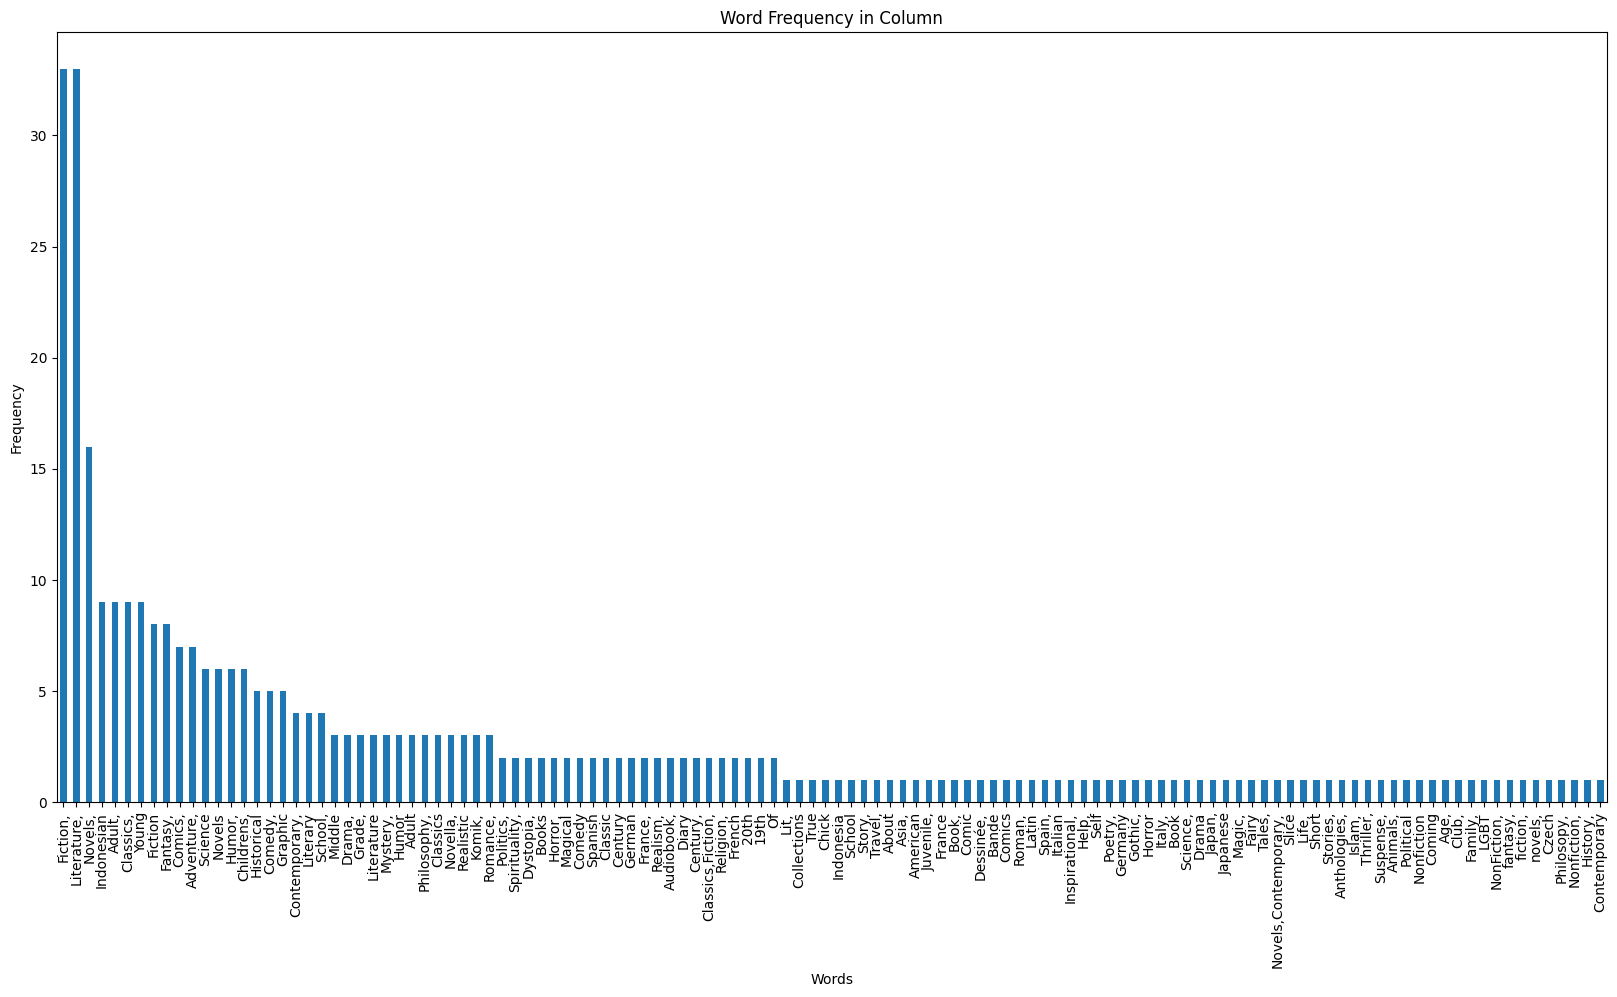

In [11]:
import matplotlib.pyplot as plt

column_data = user_profile['Genre']
word_counts = column_data.str.split(expand=True).stack().value_counts()

plt.figure(figsize=(20, 10))  # Adjust the figure size as desired
word_counts.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Column')
plt.show()

In [12]:
total_count = word_counts.sum()

word_percentages = (word_counts / total_count) * 100

top_words = word_percentages.head(30)

print(top_words)

Fiction,         9.537572
Literature,      9.537572
Novels,          4.624277
Indonesian       2.601156
Adult,           2.601156
Classics,        2.601156
Young            2.601156
Fiction          2.312139
Fantasy,         2.312139
Comics,          2.023121
Adventure,       2.023121
Science          1.734104
Novels           1.734104
Humor,           1.734104
Childrens,       1.734104
Historical       1.445087
Comedy,          1.445087
Graphic          1.445087
Contemporary,    1.156069
Literary         1.156069
School,          1.156069
Middle           0.867052
Drama,           0.867052
Grade,           0.867052
Literature       0.867052
Mystery,         0.867052
Humor            0.867052
Adult            0.867052
Philosophy,      0.867052
Classics         0.867052
dtype: float64


# Data Pre-Processing

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf berperan untuk men-convert data yang akan dijadikan landasan rekomendasi menjadi value numerik

# mengisi data yang kosong dengan '' agar tfidvectorizer bisa bekerja dengan benar
book['book_authors'] = book['book_authors'].fillna('')
book['book_desc'] = book['book_desc'].fillna('')
book['genres'] = book['genres'].fillna('')

# memilih fitur-fitur yang akan digunakan menjadi acuan dalam merekomendasikan
features =  book['book_authors'] + ' ' + book['book_desc'] + ' ' + book['genres']

tfidf = TfidfVectorizer(stop_words='english')

#Men-generate TF-IDF matrix dari landasan rekomendasi yang dipilih menggunakan fit_transform method
features_matrix = tfidf.fit_transform(features)

In [14]:
# tfidf berperan untuk men-convert data yang akan dijadikan landasan rekomendasi menjadi value numerik

# mengisi data yang kosong dengan '' agar tfidvectorizer bisa bekerja dengan benar
user_profile['Name (Original Title)'] = user_profile['Name (Original Title)'].fillna('')
user_profile['Author'] = user_profile['Author'].fillna('')
user_profile['book_desc'] = user_profile['book_desc'].fillna('')
user_profile['Genre'] = user_profile['Genre'].fillna('')

# memilih fitur-fitur yang akan digunakan menjadi acuan dalam merekomendasikan
features_user_profile =  user_profile['Name (Original Title)'] + ' ' + user_profile['Author'] + ' ' + user_profile['book_desc'] + ' ' + user_profile['Genre']

#Men-generate TF-IDF matrix dari landasan rekomendasi yang dipilih menggunakan fit_transform method
user_profile_matrix = tfidf.transform(features_user_profile)

In [15]:
features_matrix

<54301x301631 sparse matrix of type '<class 'numpy.float64'>'
	with 3919534 stored elements in Compressed Sparse Row format>

In [16]:
import numpy as np

# Membuat numpy array yang akan menampung similarity score tiap buku di user profile terhadap dataset
combined_scores = np.zeros(features_matrix.shape[0])

# looping user profile
for i in range(user_profile_matrix.shape[0]):
    # menghitung similarity tiap buku dengan buku di dataset menggunakan cosine similarity
    profile_similarity = cosine_similarity(features_matrix, user_profile_matrix[i])

    # dimasukkan ke array combined scores
    combined_scores += profile_similarity.flatten()

# sort dari nilai tertinggi ke terendah dengan mengambil 200 pertama
top_indices = np.argsort(combined_scores)[-201:][::-1]

# Membuat dataframe berisi list rekomendasi
results = pd.DataFrame({
    'Book Title': [book['book_title'][i] for i in top_indices],
    'Author': [book['book_authors'][i] for i in top_indices],
    'Genre': [book['genres'][i] for i in top_indices],
    'Description': [book['book_desc'][i] for i in top_indices],
    'Similarity Score': [combined_scores[i] for i in top_indices]
})

results

,Book Title,Author,Genre,Description,Similarity Score
0,Cuore,Edmondo de Amicis,Classics|Fiction|Childrens|European Literature...,,1.904362
1,The Call of the Wild,Jack London,Classics|Fiction|Adventure|Young Adult|Animals...,"First published in 1903, The Call of the Wild ...",1.846495
2,The Adventure of the Missing Three-Quarter,Arthur Conan Doyle,Mystery|Classics|Short Stories|Fiction|Mystery...,,1.844898
3,Kambing Jantan: Sebuah Catatan Harian Pelajar ...,Raditya Dika,Humor|Comedy|Asian Literature|Indonesian Liter...,Blogs/Journal Book,1.797613
4,Fahrenheit 451,Ray Bradbury,Classics|Fiction|Science Fiction|Science Ficti...,Alternate cover edition of ISBN10: 0345342968G...,1.750001
...,...,...,...,...,...
196,Among Others,Jo Walton,Fantasy|Fiction|Young Adult|Science Fiction|Ma...,"Startling, unusual, and yet irresistably reada...",1.063069
197,Tintin and Alph-Art,Hergé,Sequential Art|Comics|Sequential Art|Graphic N...,This book gives a unique insight into the work...,1.062753
198,The Chosen,Chaim Potok,Fiction|Classics|Historical|Historical Fiction...,It is the now-classic story of two fathers and...,1.062357
199,If I Stay Collection,Gayle Forman,Romance|Young Adult|Fiction|Contemporary|Reali...,,1.061832


In [17]:
results.to_excel('book_suggestions_tfidf3.xlsx', index=False)